### Name: Rupesh Kumar Nirala
<B> Program: Global Certificate in Data Science <BR>
Assignment: Machine Learning Foundation - April'2020 </B>

### Data - Avocado Data Set

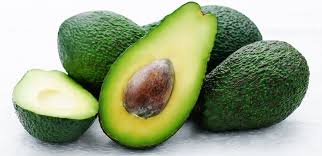

| Column Name                    | Description                                                                                |
| -------------------------------|--------------------------------------------------------------------------------------------|
| Unnamed                        | Random Number                                                                              |
| Date                           | The date of the observation                                                                |
| AveragePrice                   | the average price of a single avocado                                                      |
| Total Volume                   | Total number of avocados sold                                                              |
| 4046                           | Total number of avocados with PLU 4046 sold - Small/Medium Hass Avocado (~3-5oz avocado)   |
| 4225                           | Total number of avocados with PLU 4225 sold - Large Hass Avocado (~8-10oz avocado)         |
| 4770                           | Total number of avocados with PLU 4770 sold - Extra Large Hass Avocado (~10-15oz avocado)  |
| Total Bags                     | Total number of avocados bags sold                                                         |
| Small Bags                     | Total number of avocados small bags sold                                                   |
| Large Bags                     | Total number of avocados Large bags sold                                                   |
| XLarge Bags                    | Total number of avocados XLarge bags sold                                                  |
| type                           | conventional or organic                                                                    |
| year                           | the year                                                                                   |
| Region                         | the city or region of the observation                                                      | 




### Problem Statement

##### 1) For given avocado data set do exploratory analysis
##### 2) Predict the average price of the single avocado

### Import Python modules

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

from pandas_profiling import  profile_report

%matplotlib inline

from  sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from  sklearn.preprocessing   import StandardScaler,LabelEncoder
from  sklearn.linear_model    import LinearRegression
from  sklearn.tree            import DecisionTreeRegressor,export_graphviz
from  sklearn.ensemble        import RandomForestRegressor
from  sklearn.metrics         import mean_squared_error,r2_score

#### Load and print sample data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
#df.describe().transpose()
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.00,NaN,NaN,NaN,24.23,15.48,0.00,10.00,24.00,38.00,52.00
Date,18249,169,2015-12-20,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveragePrice,18249.00,NaN,NaN,NaN,1.41,0.40,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.00,NaN,NaN,NaN,850644.01,3453545.36,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.00,NaN,NaN,NaN,293008.42,1264989.08,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.00,NaN,NaN,NaN,295154.57,1204120.40,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.00,NaN,NaN,NaN,22839.74,107464.07,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.00,NaN,NaN,NaN,239639.20,986242.40,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.00,NaN,NaN,NaN,182194.69,746178.51,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.00,NaN,NaN,NaN,54338.09,243965.96,0.00,127.47,2647.71,22029.25,5719096.61


In [5]:
#- Drop First Column
df.drop(df.columns[0],axis=1,inplace=True)

In [6]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


#### Format Date datatype 

In [7]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

#### Transform the count columns from float to Integer 

In [8]:
for column in ['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']:
    df[column] = df[column].astype(np.int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  int64         
 3   4046          18249 non-null  int64         
 4   4225          18249 non-null  int64         
 5   4770          18249 non-null  int64         
 6   Total Bags    18249 non-null  int64         
 7   Small Bags    18249 non-null  int64         
 8   Large Bags    18249 non-null  int64         
 9   XLarge Bags   18249 non-null  int64         
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(9), object(2)
memory usage: 1.8+ MB


In [10]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany
1,2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany
2,2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany
3,2015-12-06,1.08,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany
4,2015-11-29,1.28,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany


In [11]:
profile = df.profile_report(title='Avocado Data Profiling')
profile.to_file(output_file='Avocado_Data_profiling.html')

### Exploratory Data Analysis

In [12]:

# Copy data in another dataframe to do some EDA 
df_eda = df.copy()

df_eda['Month'] = df_eda['Date'].dt.month_name()
df_eda['Week_Day'] = df_eda['Date'].dt.day_name()

In [13]:
df_eda.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Week_Day
0,2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany,December,Sunday
1,2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany,December,Sunday
2,2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany,December,Sunday
3,2015-12-06,1.08,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany,December,Sunday
4,2015-11-29,1.28,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany,November,Sunday


##### Analysis of univariate variable  

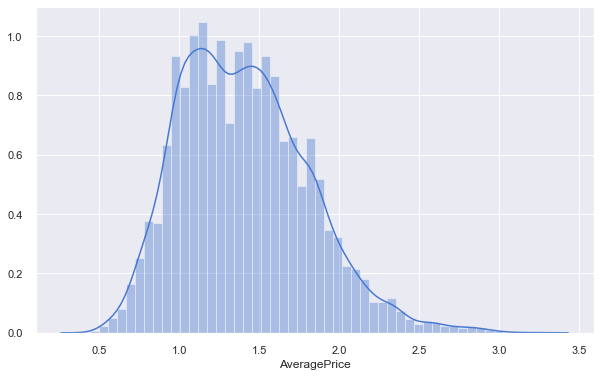

In [14]:
sns.set(color_codes=True)  
sns.set_palette(sns.color_palette("muted"))
f,ax = plt.subplots(figsize=(10,6))
sns.distplot(df_eda["AveragePrice"], ax=ax);

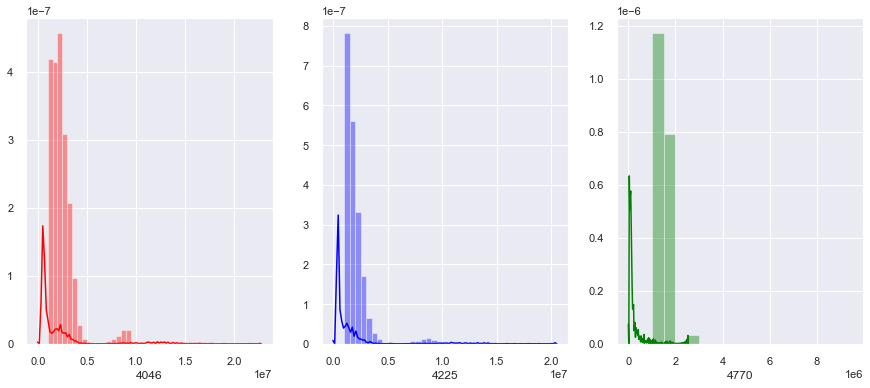

In [15]:
f,ax = plt.subplots(1,3,figsize=(15,6))
bins=np.arange(1000000,10000000,500000)
sns.distplot(df_eda["4046"],color='red',ax=ax[0], bins=bins)
sns.distplot(df_eda["4225"],color='blue',ax=ax[1], bins=bins)
sns.distplot(df_eda["4770"],color='green',ax=ax[2], bins=bins)

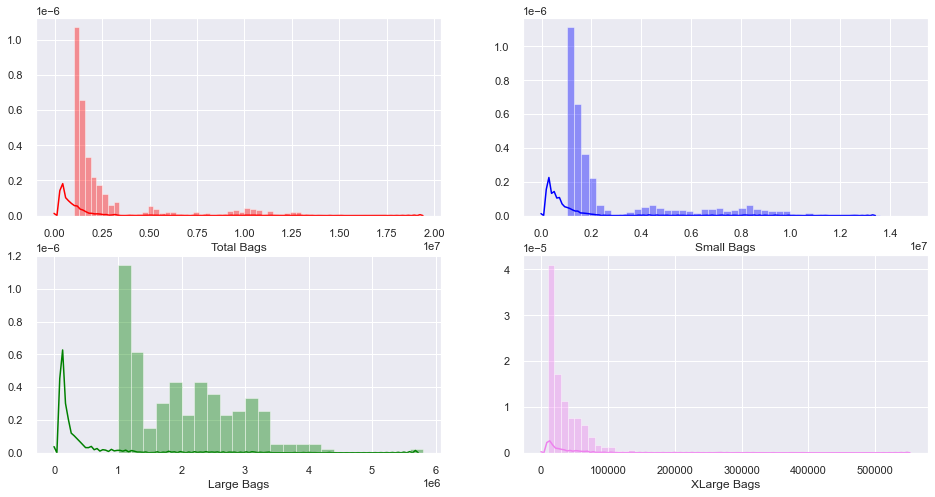

In [16]:
f,ax = plt.subplots(2,2,figsize=(16,8))

sns.distplot(df_eda["Total Bags"],color='red',ax=ax[0,0], bins=np.arange(1000000,15000000,300000))
sns.distplot(df_eda["Small Bags"],color='blue',ax=ax[0,1], bins=np.arange(1000000,15000000,300000))
sns.distplot(df_eda["Large Bags"],color='green',ax=ax[1,0], bins=np.arange(1000000,6000000,200000))
sns.distplot(df_eda["XLarge Bags"],color='violet',ax=ax[1,1], bins=np.arange(10000,150000,10000))

In [17]:
#fig,ax =plt.subplots(figsize=(12,6))
#sns.countplot(data = df_eda,x = 'Month')
#plt.title('Monthly Count by type')

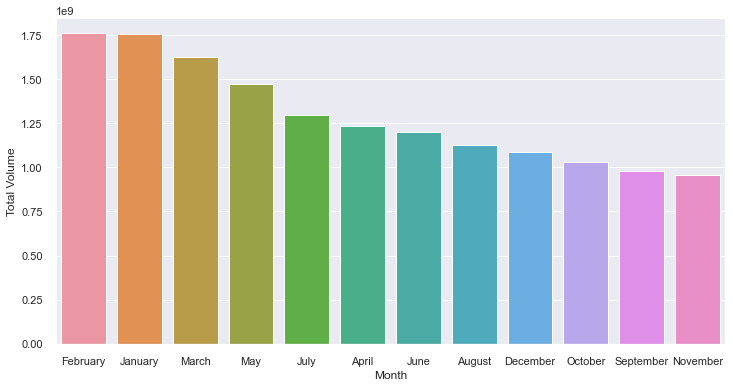

In [18]:
df_monthly_vol = df_eda.groupby('Month')[["Total Volume"]].agg(sum).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Month',y='Total Volume',data=df_monthly_vol.sort_values('Total Volume',ascending=False))

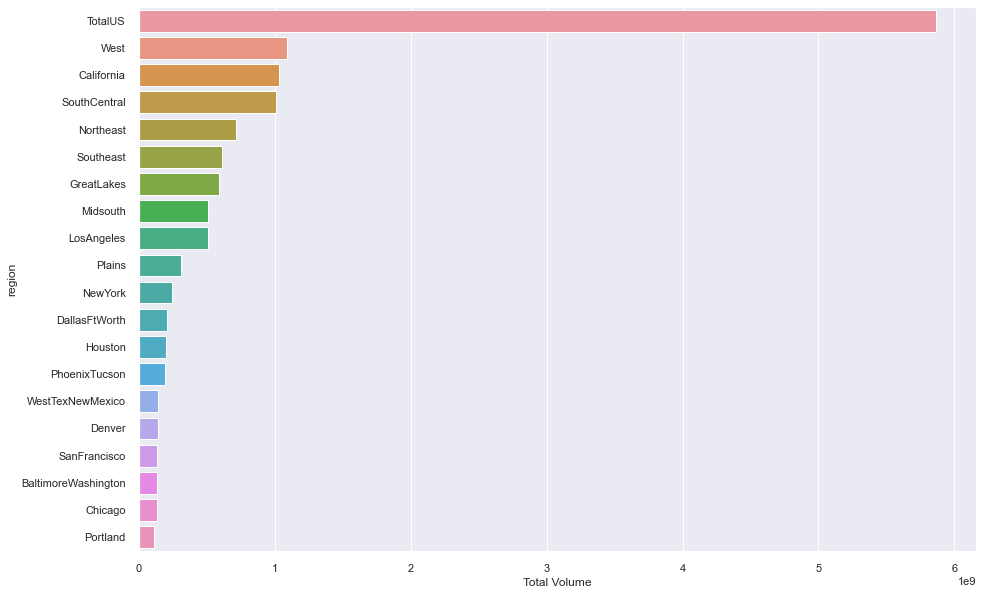

In [19]:
df_region_vol = df_eda.groupby('region')[["Total Volume"]].agg(sum).reset_index()
plt.figure(figsize=(15,10))
sns.barplot(y='region',x='Total Volume',data=df_region_vol.sort_values('Total Volume',ascending=False)[:20])
#df_region_vol

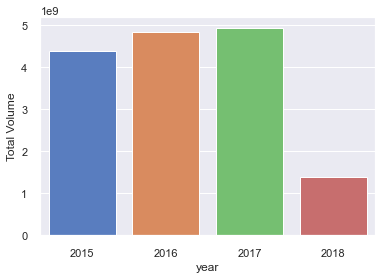

In [20]:
df_yearly_vol = df_eda.groupby('year')[["Total Volume"]].agg(sum).reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='Total Volume',data=df_yearly_vol.sort_values('Total Volume',ascending=True))

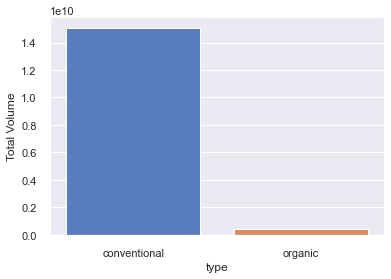

In [21]:
df_type_vol = df_eda.groupby('type')[["Total Volume"]].agg(sum).reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='type',y='Total Volume',data=df_type_vol.sort_values('Total Volume',ascending=False))

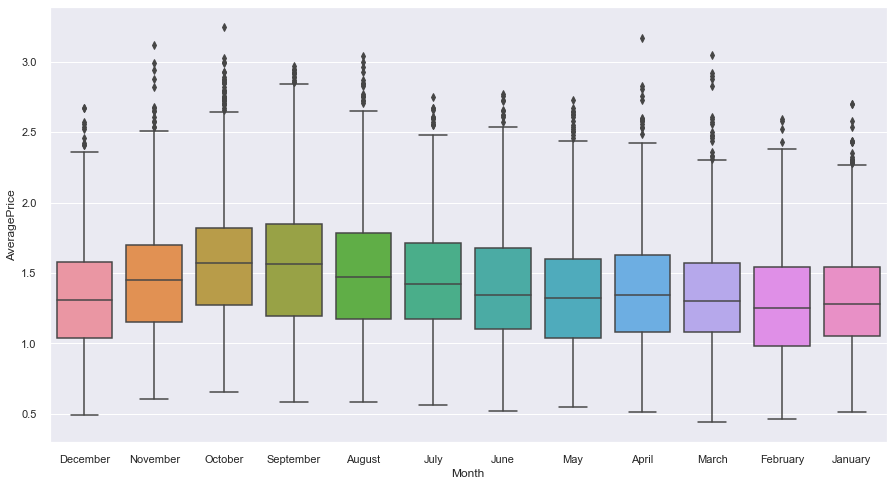

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Month',y='AveragePrice',data=df_eda)

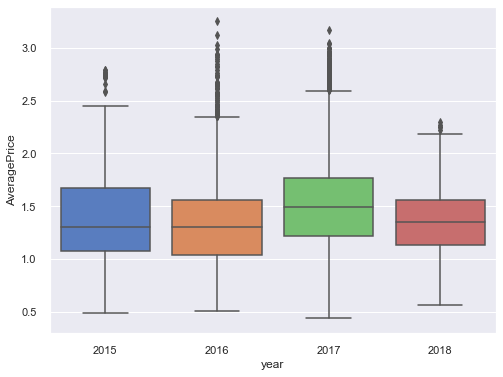

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(x='year',y='AveragePrice',data=df_eda)

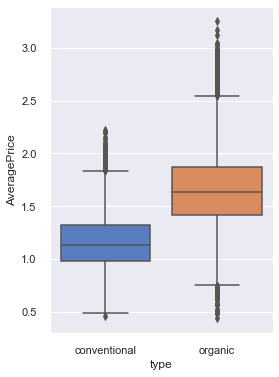

In [24]:
plt.figure(figsize=(4,6))
sns.boxplot(x='type',y='AveragePrice',data=df_eda)

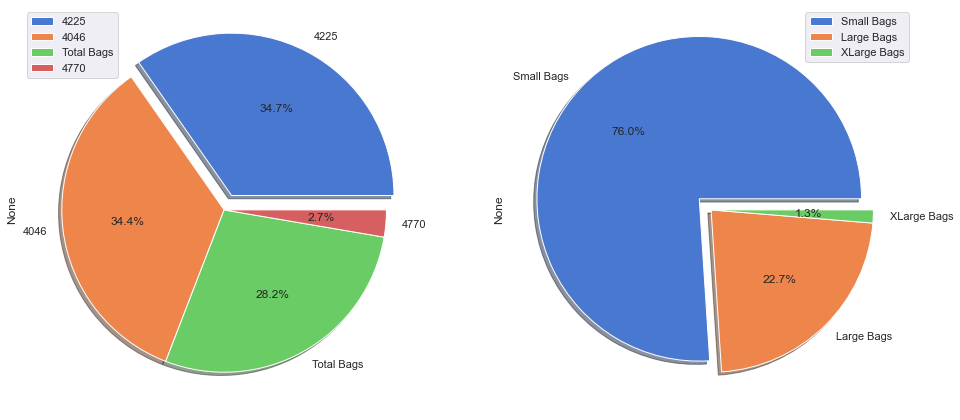

In [25]:
f,ax = plt.subplots(1,2,figsize=(16,8))
data1 = df_eda[['4046','4225','4770','Total Bags']].agg(sum).sort_values(ascending=False)
data2 = df_eda[['Small Bags', 'Large Bags', 'XLarge Bags']].agg(sum)
data1.plot.pie(explode=[0.1,0,0,0],autopct='%1.1f%%',shadow=True, legend=True, ax=ax[0])
data2.plot.pie(explode=[0.1,0,0],autopct='%1.1f%%',shadow=True, legend=True, ax=ax[1])

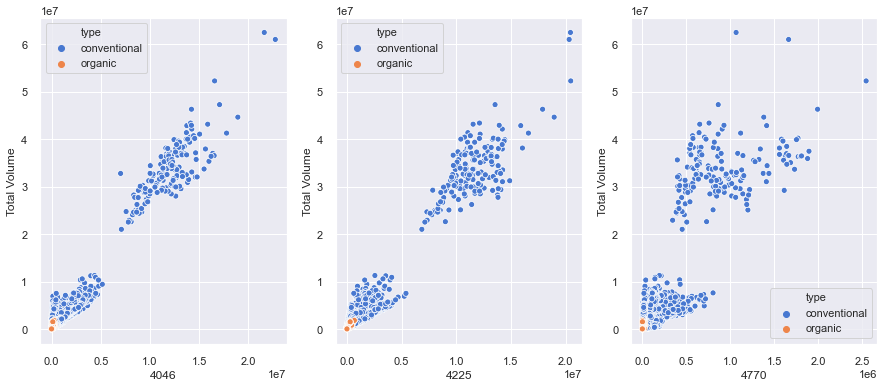

In [26]:
f,ax = plt.subplots(1,3,figsize=(15,6))
sns.scatterplot(x='4046',y='Total Volume',data=df_eda,hue='type',ax=ax[0])
sns.scatterplot(x='4225',y='Total Volume',data=df_eda,hue='type',ax=ax[1])
sns.scatterplot(x='4770',y='Total Volume',data=df_eda,hue='type',ax=ax[2])
#sns.scatterplot(x='Total Bags',y='Total Volume',data=df_eda,hue='type',ax=ax[1,1])

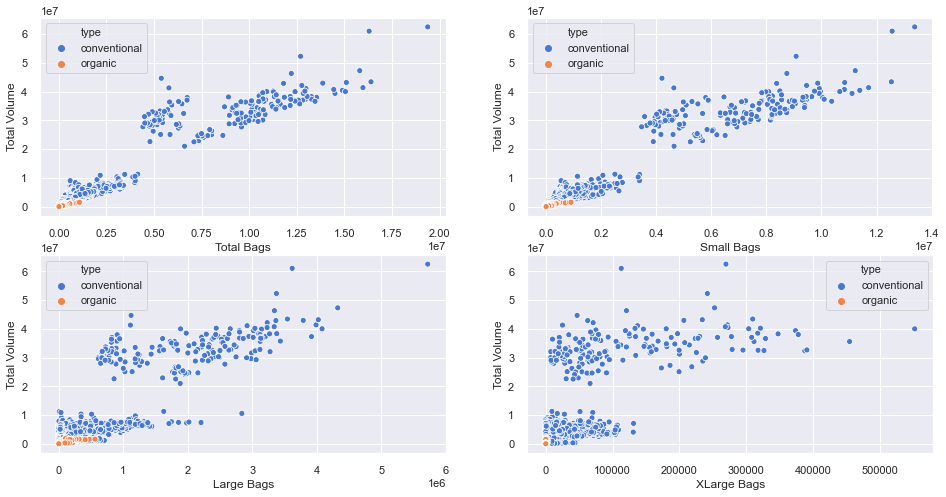

In [27]:
f,ax = plt.subplots(2,2,figsize=(16,8))
#sns.scatterplot(x='4046',y='Total Volume',data=df_eda,hue='type',ax=ax[0])
#sns.scatterplot(x='4225',y='Total Volume',data=df_eda,hue='type',ax=ax[1])
#sns.scatterplot(x='4770',y='Total Volume',data=df_eda,hue='type',ax=ax[2])
sns.scatterplot(x='Total Bags',y='Total Volume',data=df_eda,hue='type',ax=ax[0,0])
sns.scatterplot(x='Small Bags',y='Total Volume',data=df_eda,hue='type',ax=ax[0,1])
sns.scatterplot(x='Large Bags',y='Total Volume',data=df_eda,hue='type',ax=ax[1,0])
sns.scatterplot(x='XLarge Bags',y='Total Volume',data=df_eda,hue='type',ax=ax[1,1])

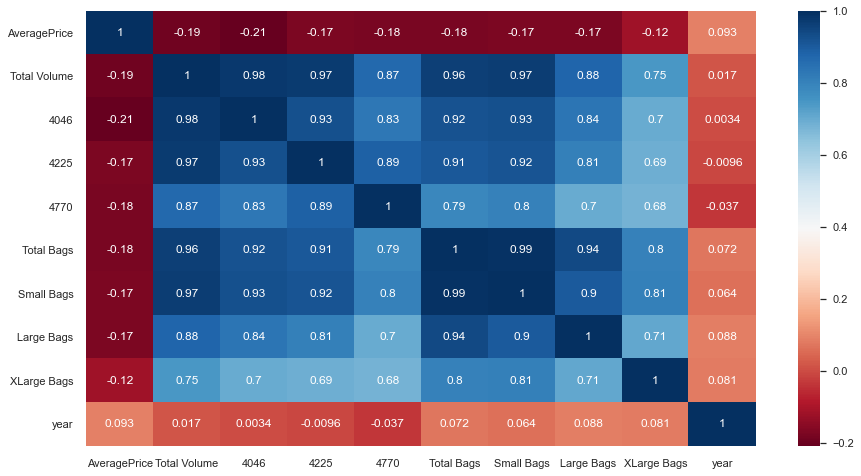

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df_eda.corr(),cmap='RdBu', annot=True)

### Predictive Analytics using different ML models

#### Cleaning data 

In [29]:
## Breaking date into month and finally dropping date
df['Month'] = df.Date.dt.month_name()
df.drop('Date',axis=1,inplace=True)

In [30]:
## Total Volume is highly corelated with many other fields so dropping Total Volume column
df.drop('Total Volume',axis=1,inplace=True)

In [31]:
## Total Bags is highly corelated with many other fields so dropping Total Bags column
df.drop('Total Bags',axis=1,inplace=True)

In [32]:
df.head(2)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,1036,54454,48,8603,93,0,conventional,2015,Albany,December
1,1.35,674,44638,58,9408,97,0,conventional,2015,Albany,December


#### Validating assumptions

#### 1. Assumption : Target Variable should be normally distributed

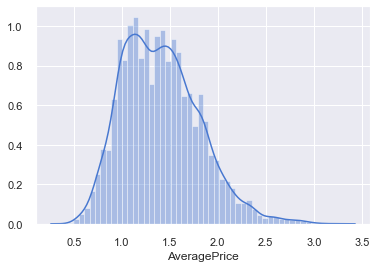

In [33]:
sns.distplot(df.AveragePrice)

#### 2. Assumption :  Linear Relationship between Target Variable and Explanatory variables(Features)

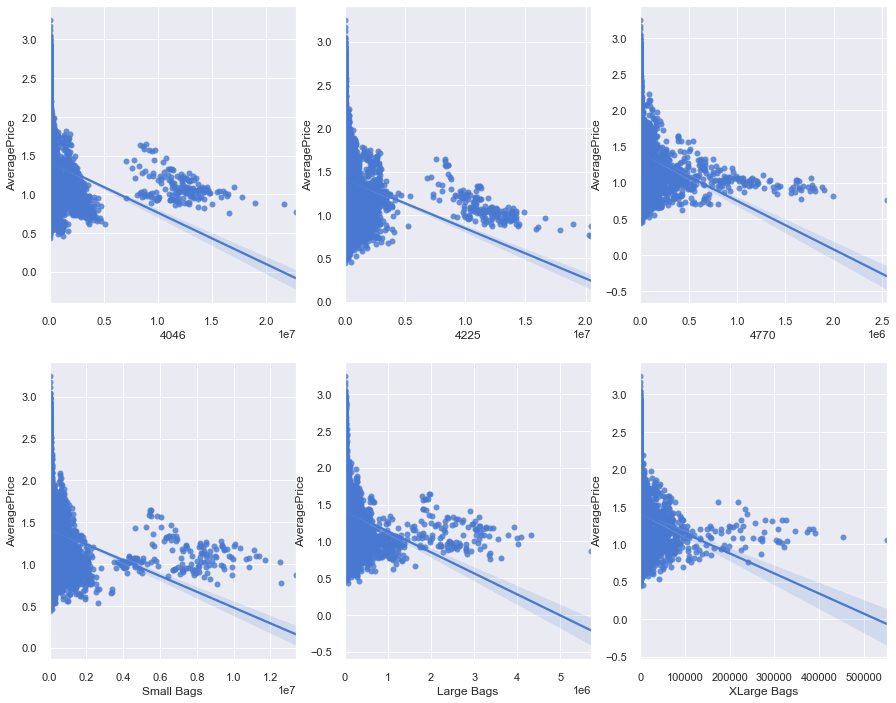

In [34]:
f,ax = plt.subplots(2,3,figsize=(15,12))
sns.regplot(x='4046',y='AveragePrice',data=df,ax=ax[0,0])
sns.regplot(x='4225',y='AveragePrice',data=df,ax=ax[0,1])
sns.regplot(x='4770',y='AveragePrice',data=df,ax=ax[0,2])
sns.regplot(x='Small Bags',y='AveragePrice',data=df,ax=ax[1,0])
sns.regplot(x='Large Bags',y='AveragePrice',data=df,ax=ax[1,1])
sns.regplot(x='XLarge Bags',y='AveragePrice',data=df,ax=ax[1,2])

Text(0.5, 1.0, 'Pair Plot')

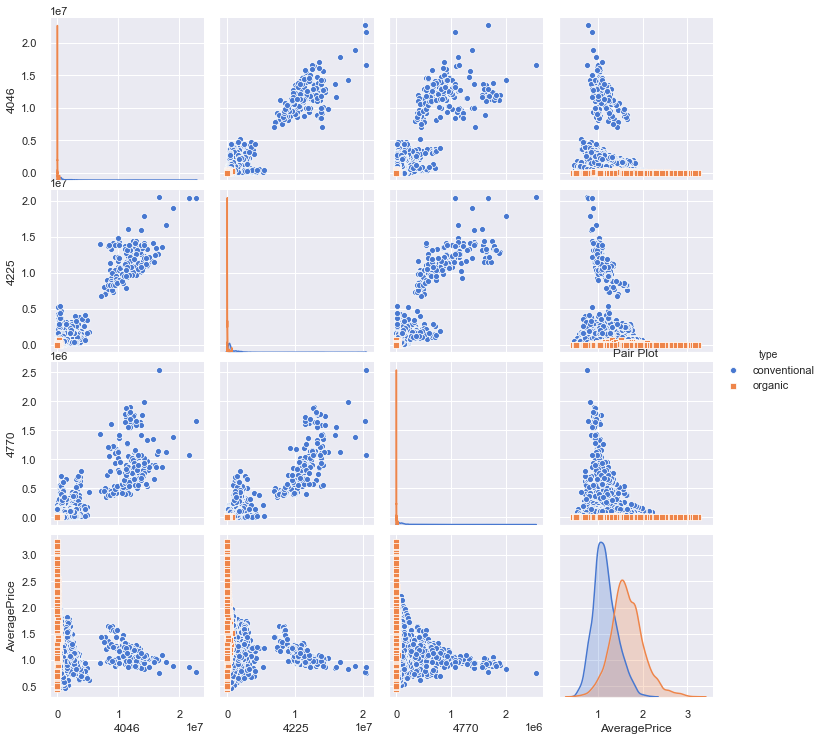

In [35]:
sns.pairplot(df[["4046","4225","4770","AveragePrice", "type"]],vars = ["4046","4225","4770","AveragePrice"],hue="type", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')



#### 3. Assumption : No Multicollinearity (High Correlation between feature variables)

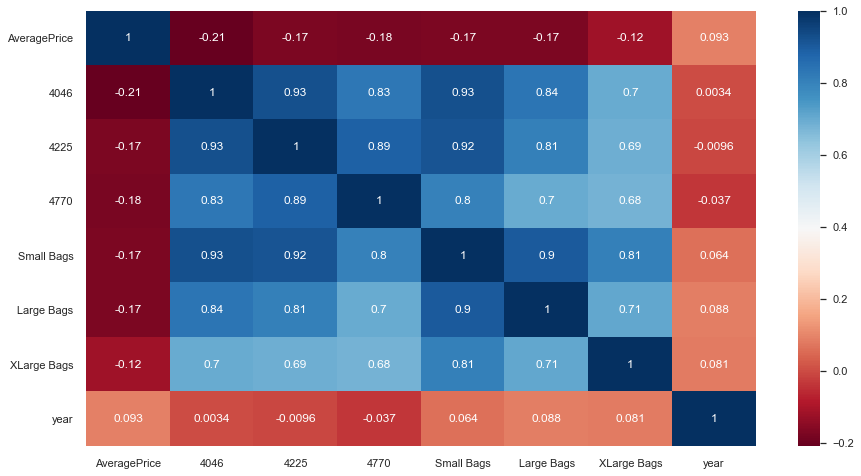

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='RdBu', annot=True)

In [37]:
df.head(2)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,1036,54454,48,8603,93,0,conventional,2015,Albany,December
1,1.35,674,44638,58,9408,97,0,conventional,2015,Albany,December


#### Handling of Categorical column: (OneHot Encoding)

In [38]:
df = pd.get_dummies(data=df,columns=['type','region','Month'],drop_first=True)

In [39]:
df.head(2)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,type_organic,region_Atlanta,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,1.33,1036,54454,48,8603,93,0,2015,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.35,674,44638,58,9408,97,0,2015,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Splitting data - Train-Test Split

In [44]:
# Explanatory variables
X = df.loc[:,df.columns != 'AveragePrice']  
# Target Variables
y = df['AveragePrice']

In [46]:
#- Train - Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [47]:
print("X_Train Shape",X_train.shape)
print("X_Test  Shape",X_test.shape)
print("y_Train Shape",y_train.shape)
print("y_Test  Shape",y_test.shape)

X_Train Shape (14599, 72)
X_Test  Shape (3650, 72)
y_Train Shape (14599,)
y_Test  Shape (3650,)


#### Standardize Explanatory variables - Scale features using StandardScaler

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

#### 1. Create Linear Regression Model 

In [52]:
model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled,y_train)

y_model_linreg_pred_train = model_linreg.predict(X_train_scaled)
y_model_linreg_pred_test = model_linreg.predict(X_test_scaled)

#print(model_linreg.intercept_,model_linreg.coef_)

#### 2. Create Decision Tree Model 

In [53]:
model_dtreg = DecisionTreeRegressor()
model_dtreg.fit(X_train_scaled,y_train)

y_model_dtreg_pred_train = model_dtreg.predict(X_train_scaled)
y_model_dtreg_pred_test  = model_dtreg.predict(X_test_scaled)

#### 3. Create Decision Tree Model using GridSearchCV 

In [55]:
model_dtreg_grid = DecisionTreeRegressor(random_state=0)
tree_params = {
                'criterion'  : ['mse'],
                'splitter'   : ['best','random'],
                'max_depth'  : np.arange(5,20),
              }

model_dtreg_grid = GridSearchCV(model_dtreg_grid,tree_params,cv=10,n_jobs=3)
model_dtreg_grid.fit(X_train_scaled,y_train)

print("Mean cross-validated score of the best_estimator : ", model_dtreg_grid.best_score_)  
print("params we got the best score : ",model_dtreg_grid.best_params_)

y_model_dtreg_grid_pred_train = model_dtreg_grid.predict(X_train_scaled)
y_model_dtreg_grid_pred_test  = model_dtreg_grid.predict(X_test_scaled)

Mean cross-validated score of the best_estimator :  0.7636114098420232
params we got the best score :  {'criterion': 'mse', 'max_depth': 19, 'splitter': 'best'}


#### 4. Create Random Forest Model

In [56]:
model_rfreg = RandomForestRegressor(criterion='mse')
model_rfreg.fit(X_train_scaled,y_train)
y_model_rfreg_pred_train = model_rfreg.predict(X_train_scaled)
y_model_rfreg_pred_test  = model_rfreg.predict(X_test_scaled)

#### 5. Create Random Forest Model with  RandomSearchCV

In [57]:
model_rfreg_rand = RandomForestRegressor()
parameters = {
    "criterion" : ['mse'],
    "max_depth" : np.arange(5,20),
    "bootstrap" : [True,False]
}
model_rfreg_rand = RandomizedSearchCV(model_rfreg_rand,parameters,n_iter=10,n_jobs=3,cv=10)
model_rfreg_rand.fit(X_train_scaled,y_train)
y_model_rfreg_rand_pred_train = model_rfreg_rand.predict(X_train_scaled)
y_model_rfreg_rand_pred_test = model_rfreg_rand.predict(X_test_scaled)

#### Model Evaluation 

In [59]:
#- P - number of explanatory varaibles  X_test.shape[-1]
#- N - number of observations           X_test.shape[0]
def adjusted_rsquare(r_square,P,N):
    return (1 - ((( 1 -r_square)*(N - 1))/(N-P-1)))

In [66]:
#- Root Mean Square Error , R-squired and Adjusted R-Squired 
#y_model_linreg_pred_test
#y_model_dtreg_pred_test
#y_model_dtreg_grid_pred_test
#y_model_rfreg_pred_test
#y_model_rfreg_rand_pred_test

rmse1 = np.sqrt(mean_squared_error(y_test,y_model_linreg_pred_test))
rmse2 = np.sqrt(mean_squared_error(y_test,y_model_dtreg_pred_test))
rmse3 = np.sqrt(mean_squared_error(y_test,y_model_dtreg_grid_pred_test))
rmse4 = np.sqrt(mean_squared_error(y_test,y_model_rfreg_pred_test))
rmse5 = np.sqrt(mean_squared_error(y_test,y_model_rfreg_rand_pred_test))

Rsq1 = r2_score(y_test,y_model_linreg_pred_test)
Rsq2 = r2_score(y_test,y_model_dtreg_pred_test)
Rsq3 = r2_score(y_test,y_model_dtreg_grid_pred_test)
Rsq4 = r2_score(y_test,y_model_rfreg_pred_test)
Rsq5 = r2_score(y_test,y_model_rfreg_rand_pred_test)

AdjrSq1 = adjusted_rsquare(Rsq1,X_test.shape[-1],X_test.shape[0])
AdjrSq2 = adjusted_rsquare(Rsq2,X_test.shape[-1],X_test.shape[0])
AdjrSq3 = adjusted_rsquare(Rsq3,X_test.shape[-1],X_test.shape[0])
AdjrSq4 = adjusted_rsquare(Rsq4,X_test.shape[-1],X_test.shape[0])
AdjrSq5 = adjusted_rsquare(Rsq5,X_test.shape[-1],X_test.shape[0])



In [69]:
model_selection = pd.DataFrame({
    "Models"   : ("Linear Regression", "Decision Tree", "Decision Tree With GridSearchCV", "Random Forest","Random Forest With RandomSearchCV"),
    "RMSE"     : (rmse1, rmse2, rmse3, rmse4, rmse5),
    "R Squired": (Rsq1, Rsq2,Rsq3,Rsq4, Rsq5),
    "Adjusted R-Squired": (AdjrSq1, AdjrSq2, AdjrSq3, AdjrSq4, AdjrSq5)
})

model_selection


,Models,RMSE,R Squired,Adjusted R-Squired
0,Linear Regression,0.24,0.63,0.62
1,Decision Tree,0.19,0.78,0.78
2,Decision Tree With GridSearchCV,0.18,0.79,0.79
3,Random Forest,0.13,0.90,0.90
4,Random Forest With RandomSearchCV,0.14,0.89,0.88
